<font face="B Mitra" size=4>
<div dir=rtl align=center>
<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">
<br>
<font size=6>
<b>پروژه سوم داده کاوی</b>
<br>
<b><font size=5> استاد درس: دکتر فاطمه شاکری</b>
<hr>
</div>
</font>

<font face="B Mitra">
<div dir=rtl>
<font size=5>
کتابخانه های موردنیاز را در این بخش بارگذاری کنید.
</p>
</font>
</div>
</font>

In [ ]:
# !pip install langdetect
# !pip install scispacy
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_lg-0.5.4.tar.gz

<font face="B Mitra">
<div dir=rtl>
<font size=5>
نصب پکیج <code>spacy</code> ممکن است وابسته به سیستم‌عامل و پکیج‌منیجر شما نیاز به دستوری متفاوت داشته‌باشد. دستور مناسب را می‌تواند با استفاده از
<a href="https://spacy.io/usage">این لینک</a> بیابید.
</p>
</font>
</div>
</font>

In [1]:

import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_formats = ['svg']
import seaborn as sns

# Used to draw a progress bar for longer method calls
from tqdm import tqdm

# Used to detect language used in each document
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

# Pre-trained natural language processing pipeline for biomedical use
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_sci_lg

# Used to import list of punctuations
import string

# Feature extraction (text vectorizers)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Clustering and evaluation
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# Topic modeling
from sklearn.decomposition import LatentDirichletAllocation

<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> لود کردن مجموعه داده </b>
<br>
<p align="justify">
<font size=5>
فایل مجموعه داده در <a href="https://drive.google.com/file/d/15E8FLX0C-6qpK-lDBEQJXw00Lsdcvjae/view?usp=sharing">گوگل درایو</a> در اختیار شما قرار گرفته است:
<br>
همچنین در صورت استفاده از گوگل کولب با استفاده از دستور زیر میتوانید مجموعه داده را از گوگل درایو در نوتبوک خود دانلود کنید.
</p>
</font>
</div>
</font>

!gdown 15E8FLX0C-6qpK-lDBEQJXw00Lsdcvjae

<font face="B Mitra">
<div dir=rtl>
<font size=5>
در شروع کار،دیتافریم موردنظر خود را ایجاد کردیم و مقادیر خالی را با space جایگزین کردیم.
دلیل این کار جلوگیری از خطا در مصورسازی انتهایی است.<br>
سپس با توجه به زمانبر بودن اجرا،حداقل یک سمپل 1500 تایی نمونه برداری کردیم.
<br>
برای کسب نتایج بهتر و مصورسازی مناسبتر میتوانیم تعداد سمپل را افزایش دهیم.
</p>
</font>
</div>

In [2]:
df_10k = pd.read_csv('10k_df.csv')

In [3]:
df_10k.fillna(value=" ",inplace=True)

In [4]:
df = df_10k.sample(1500, random_state=42).reset_index()
df.drop('index', axis=1, inplace=True)
del df_10k

<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> پیش پردازش متن</b>
<br>
<p align="justify">
<font size=5>
 برای پیش پردازش متون از کتابخانه های مختلفی از جمله NLTK ،Gensim یا Spacy میتوان استفاده کرد.
 <br>
 مواردی که در پیش پردازش متون باید به آن توجه کرد.
 <ol>
 <br>
 <li> <b>تشخیص زبان مورداستفاده مقاله ها:</b>
  در این مجموعه داده میتوانید  با استفاده از کتابخانه langdetect زبان مورد استفاده مقاله را در ویژگی <code>body_text</code> بررسی کنید.
 با توجه به نتیجه نهایی خواهید دید که زبان انگلیسی زبان غالب در این مقاله هاست بنابراین میتوان مقاله های غیر انگلیسی را حذف کرد.
 </li>
 <li> <b>توکنایز کردن (Tokenize) مدل ها:</b>
 در این مجموعه داده از  پایپ لاین  <code>en_core_sci_lg</code> از کتابخانه  spaCy به دلیلی پشتبانی از داده های زیستی و پزشکی و با بردارهای 600 هزار کلمه ای و واژگان بزرگتر میتوانیم استفاده کنیم.<br>
 به دلیل اینکه SpaCy حداکثر یک میلیون کاراکتر را بررسی میکند میتوان با استفاده از max_length این محدودیت را کاهش داد:
 لطفا از parser مشخص شده در بخش زیر برای توکنایز کردن متن خود استفاده کنید.


 </li>
 <li> <b> Lemmatization یا Stemming (ریشه یابی) </b>
 </li>
 <li> <b>حذف Stopwords</b> </li>
 <li> <b>حذف علائم نشانه گذاری</b> </li>
 </ol>
<br>
درمورد هر یک از موارد بالا جستجو کنید و پیش پردازش های لازم را برای ویژگی "body text" مقاله انجام دهید.
</p>
</font>
</div>
</font>

<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> پاسخ</b>
<br>
<p align="justify">
<font size=5>
 
 <br>توکنایز کردن: عمل تجزیه‌ ی یک متن طولانی بلوک هایی به‌ نام «توکن» است. این بلوک ها لزوما معنادار نیستند اما به مدل کمک می کنند به درک بهتری از متن برسد.<br>
 <br>ریشه ‌یابی: در ریشه یابی، پیشوندها و پسوندها را از کلمات جدا می‌کنند تا ریشه و معنی کلمه استخراج شود. این تکنیک با کاهش حجم فایل‌های شاخص‌گذاری بازیابی اطلاعات را بهبود می‌بخشد. ۲ نوع معروف ریشه یابی stemming و lemmatization نام دارد و تفاوت آنها در این است که در روش stemming ممکن است کلمات بی معنا تولید شود و الگوریتم به محتوای متن اهمیتی نمی دهد در حالیکه در lemmatization الگوریتم هنگام استخراج ریشه به محتوای ریشه اهمیت می دهد و خروجی الگوریتم کلمات معنادار است.<br>
 <br> کلمات توقف (stopwords): کلماتی مانند "امم"، "مثل" و "می دانید" کلمات پرکننده ای هستند که اطلاعات کمی دارند. وقتی صحبت از مدل های پردازش زبان طبیعی (NLP) و انجام بازیابی داده ها می شود، باید به مدل ها گفته شود که این کلمات را در نظر نگیرند. به این گونه کلمات که اطلاعاتی به مدل اضافه نمی کنند کلمات توقف می گویند.<br>

</p>
</font>
</div>
</font>

In [5]:
# Recognize Language and delete non english essays
from langdetect import detect

english_texts = 0
all_texts = df.shape[0]
k = 0
for essay in df["body_text"]:
    lang = detect(essay) 
    if lang == 'en':
        english_texts += 1
    else:
        df.drop(k, inplace=True)
    k += 1
    
print("English Essays: ", english_texts/all_texts)

English Essays:  0.9693333333333334


In [6]:
from nltk.stem import PorterStemmer

# Stemming
def stemming(doc):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token.text) for token in doc]
    return stemmed_tokens

# Lemmatization
def lemmatization(doc):
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens

In [7]:
#TODO

# Parser
parser = en_core_sci_lg.load(disable=["tagger", "ner"])
parser.max_length = 3000000

# Lemmatization or stemming 
tokens = []
for body_text in df["body_text"]:
    
    doc = parser(body_text)
    tokens.append(lemmatization(doc))


/Users/sarvinbaghi/Library/Python/3.9/lib/python/site-packages/spacy/language.py:2195: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]
/Users/sarvinbaghi/Library/Python/3.9/lib/python/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [8]:
import nltk
from nltk.corpus import stopwords

stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 
'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 
'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 
'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 
'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 
'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 
'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 
's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y',
 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
 "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 
'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

punctuation_marks = [".", "?", "!", ",", ";", ":", "-", "_", "—", "(", ")", "[", "]", "{", "}", "'"]
 

#with no lower case conversion
filtered_text = []

for i in range(len(tokens)):
    t = []
    for w in tokens[i]:
        if w not in stop_words and w not in punctuation_marks:
            t.append(w)
    filtered_text.append(' '.join(t))
 
# df.replace(df["body_text"], filtered_text)


In [21]:
df = df.reset_index()
for x in range(df.shape[0]):
    df.replace(df["body_text"][x], filtered_text[x], inplace=True)
    
df.to_csv('preprocess_df.csv', index=False)

<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> استخراج ویژگی </b>
<br>
<p align="justify">
<font size=5>
اکنون که متن بدنهٔ مقاله‌ها را از قبل پردازش کرده‌ایم، زمان تبدیل آن‌ها به قالبی است که توسط الگوریتم‌های ما قابل استفاده باشد. برای این منظور از tf-idf استفاده خواهیم کرد. tf_idf  یک الگوریتم بسیار رایج برای تبدیل متن به نمایش معنی دار اعداد است که اهمیت هر کلمه را در متن موردنظر نشان میدهد. <br>
درمورد عملکرد این روش جستجو کنید.
 برای متن پیش پردازش شده هر مقاله، با استفاده از این روش یک بازنمایی برداری با حداکثر 4096 ویژگی ایجاد کنید.
</p>
</font>
</div>
</font>

<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> پاسخ</b>
<br>
<p align="justify">
<font size=5>
Term Frequency - Inverse Document Frequency (TF-IDF)  یک روش آماری پرکاربرد در پردازش زبان طبیعی و بازیابی اطلاعات است. هدف از این روش، اندازه گیری میزان اهمیت یک عبارت (term) در یک متن در مقایسه با سایر متون است. در این روش، کلمات درون یک متن با یک فرآیند برداری به اعداد تبدیل می شوند. 
برای هر عبارت ۲ پارامتر TF و IDF محاسبه می شود و TF-ID هر عبارت برابر با حاصلضرب آنها است.<br>
پارامتر TF: تعداد دفعاتی که یک عبارت در یک متن در مقایسه با تعداد کل کلمات متن ظاهر می شود.<br>
پارامتر IDF: نسبت متون موجود در مجموعه که حاوی این عبارت هستند. کلمات منحصر به فرد برای درصد کمی از اسناد (به عنوان مثال اصطلاحات تخصصی) ارزش بالاتری نسبت به کلمات رایج در همه اسناد دریافت می کنند.

</p>
</font>
</div>
</font>

In [119]:
preprocess_df = pd.read_csv('preprocess_df.csv')
preprocess_df.drop('index', axis=1, inplace=True)
preprocess_df.drop('level_0', axis=1, inplace=True)
preprocess_df.head(5)

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary
0,fefd6cdcddcb00d1ba2ef1a0d3bba9f312010a1d,10.1111/j.1524-4733.2008.00379.x,,china biggest country world 1.3 billion popula...,"Li, Youing. Sun, Xin. Wang, Li",Evidence-Based Medicine in China,Value in Health,Not provided.
1,2a3d080d5dcf6771db002366691f35e5d6f0e493,10.1007/s13238-010-0029-7,,✉ correspondence zlshi@wh.iov.cn bat flying ma...,"Shi, Zhengli",Bat and virus,Protein & Cell,Not provided.
2,2de657aabab331e75657bfc1443542fd345b6f26,10.1016/j.ccc.2019.06.001,KEYWORDS\nPandemic Influenza Disaster prepared...,outbreaks infectious disease pose unique chall...,"Maves, Ryan C.. Jamros, Christina M.. Smith...",Intensive Care Unit Preparedness During<br>Pa...,Crit Care Clin,KEYWORDS\nPandemic Influenza Disaster<br>prep...
3,bc22758234283f024f16e2dbe660bc909b512b92,10.1016/j.vetpar.2007.11.020,Cryptosporidium parvum is recognized as one of...,diarrhoeal diseases infectious aethiology repr...,"Klein, Pavel. Kleinová, Tereza. Volek,<br>Z...",Effect of Cryptosporidium parvum infection on...,Veterinary Parasitology,Cryptosporidium parvum is recognized as one o...
4,a204aafa38365dbcc0a26af3ca2c6d3313d7fab2,10.1111/irv.12518,", Brazil, in the period of Background: The res...",inclusion criteria asymptomatic adults absence...,"Moreira, Luciana Peniche. Watanabe, Aripuana...",Respiratory syncytial virus evaluation among<...,Influenza Other Respir Viruses,", Brazil, in the period of Background: The<br..."


In [120]:
#TODO

# countvectorizer = CountVectorizer(analyzer= 'word')
tfidfvectorizer = TfidfVectorizer(analyzer='word', max_features=4096)

# count_wm = countvectorizer.fit_transform(preprocess_df["body_text"]).toarray()
tfidf_wm = tfidfvectorizer.fit_transform(preprocess_df["body_text"]).toarray()

# count_tokens = countvectorizer.get_feature_names_out()
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

# df_countvect = pd.DataFrame(data = count_wm,columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm,columns = tfidf_tokens)
# print("Count Vectorizer\n")
# print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect.shape)
print(df_tfidfvect)



TD-IDF Vectorizer

(1454, 4096)
            00       000     0001  001       01   02       03   04        05   
0     0.000000  0.028658  0.00000  0.0  0.00000  0.0  0.02373  0.0  0.000000  \
1     0.000000  0.000000  0.00000  0.0  0.00000  0.0  0.00000  0.0  0.000000   
2     0.000000  0.044930  0.00000  0.0  0.00000  0.0  0.00000  0.0  0.000000   
3     0.000000  0.000000  0.00000  0.0  0.00844  0.0  0.00000  0.0  0.000000   
4     0.000000  0.000000  0.07204  0.0  0.00000  0.0  0.00000  0.0  0.013466   
...        ...       ...      ...  ...      ...  ...      ...  ...       ...   
1449  0.000000  0.000000  0.00000  0.0  0.00000  0.0  0.00000  0.0  0.000000   
1450  0.008531  0.000000  0.00000  0.0  0.00000  0.0  0.00000  0.0  0.010029   
1451  0.000000  0.006279  0.00000  0.0  0.00000  0.0  0.00000  0.0  0.007032   
1452  0.000000  0.023917  0.00000  0.0  0.00000  0.0  0.00000  0.0  0.000000   
1453  0.000000  0.000000  0.00000  0.0  0.00000  0.0  0.00000  0.0  0.000000   

      

<font face="B Mitra"><div dir=rtl>
<font size=6>
<b> PCA </b>
<br>
<p align="justify">
<font size=5>
با توجه به ابعاد بالای هر بردار ویژگی، با استفاده از روش PCA با حفظ 95 درصد واریانس کاهش بعد دهید.
</p>
</font>
</div>

In [121]:
#TODO
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
tfidf_scaled = scaler.fit_transform(tfidf_wm)

pca = PCA(n_components=0.95)
tfidf_pca = pca.fit_transform(tfidf_scaled)
print(tfidf_pca.shape)

(1454, 1108)


<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> خوشه بندی </b>
<br>
<p align="justify">
<font size=5>
خوشه بندی مقالات تحقیقاتی مشابه با هم می تواند جستجوی انتشارات مرتبط را ساده کند.  در اینجا از روش K-Means برای خوشه بندی استفاده میکنیم.<br>
 با استفاده از روش Elbow Method  از بین تعداد خوشه های داده شده، میتوانید بهترین تعداد خوشه را بیابید.
<br>
تا 30 خوشه این موضوع را مورد بررسی قرار دهید و پس از یافتن تعداد خوشه مناسب، با استفاده از روش K-Means خوشه بندی لازم را برای بردار ویژگی
بدست آماده از مرحلهٔ قبل به کار بگیرید.
<br><b> بخش امتیازی:</b> میتوانید با به کارگیری روش های دیگر خوشه بندی نظیر خوشه بندی سلسه مراتبی یا DBSCAN نتایج را با استفاده از یک معیار ارزیابی مناسب  مقایسه کنید.
</p>
</font>
</div>

In [122]:
#TODO

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

K = range(1, 31)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(tfidf_pca)
    kmeanModel.fit(tfidf_pca)
 
    distortions.append(sum(np.min(cdist(tfidf_pca, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / tfidf_pca.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(tfidf_pca, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / tfidf_pca.shape[0]
    mapping2[k] = kmeanModel.inertia_

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

/Users/sarvinbaghi/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sarvinbaghi/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sarvinbaghi/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sarvinbaghi/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

KeyboardInterrupt: 

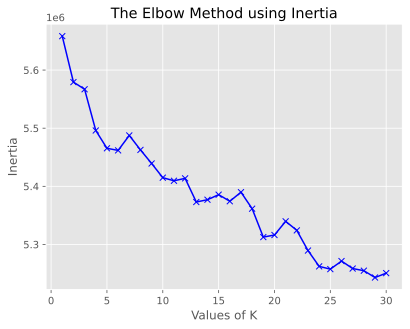

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [123]:
number_of_cluster = 19
kmeanModel = KMeans(n_clusters=number_of_cluster)
kmean_cluster = kmeanModel.fit_predict(tfidf_pca)

/Users/sarvinbaghi/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [124]:
kmean_cluster

array([10, 13, 10, ...,  0, 13, 13], dtype=int32)

<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> t-SNE </b>
<br>
<p align="justify">
<font size=5>
t_SNE یک روش نظارت نشده غیر خطی است که برای اکتشاف و بصری‌سازی داده‌ها مورد استفاده قرار می‌گیرد.
PCA یک روش کاهش ابعاد خطی است که در تلاش برای بیشینه کردن واریانس و حفظ فاصله‌های زیاد دوتایی‌ها از یکدیگر است. این امر می‌تواند منجر به بصری‌سازی ضعیف به ویژه هنگام کار با ساختارهای غیرخطی می‌شود. t-SNE  با حفظ فاصله‌های کم دوتایی‌ها یا شباهت محلی از PCA متمایز می‌شود. به بیان ساده‌تر، t-SNE به کاربر درکی از اینکه داده‌ها چگونه در فضای ابعاد بالا سازمان‌دهی شده‌اند را ارائه می‌کند. <br>
با استفاده از t-SNE می توانیم بردار ویژگی هایی با ابعاد بالا را به 2 بعد کاهش دهیم.
در این مجموعه داده در 2 بعد می توان توزیع مقالات را با استفاده از scatterplot نمایش داد. <br>
برای تفکیک بصری موضوعات مختلف در نمودار بالا، با استفاده از خوشه هایی که در KMeans یافتید ، برای رنگ آمیزی خوشه های مختلف در مصورسازی خود میتوانید استفاده کنید.
</p>
</font>
</div>

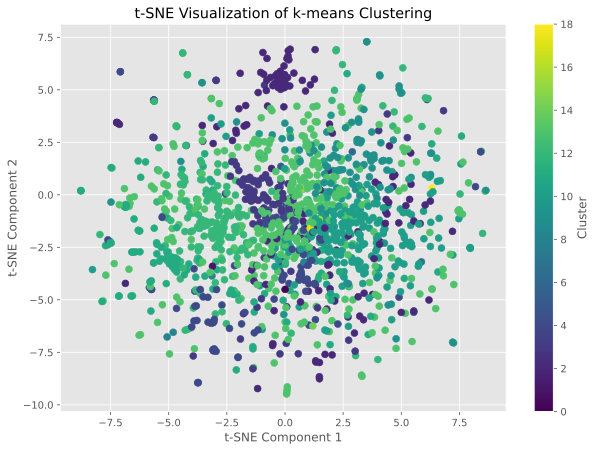

In [125]:
#TODO
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(tfidf_pca)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmean_cluster, cmap='viridis', s=50)
plt.title('t-SNE Visualization of k-means Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> مدلسازی موضوعی (Topic Modeling)</b>
<br>
<p align="justify">
<font size=5>
اکنون سعی خواهیم کرد موضوعات کلیدی در هر خوشه را پیدا کنیم.
<br>
 K-means مقالات را خوشه بندی کرد اما موضوعات را برچسب گذاری نکرد. از طریق مدل‌سازی موضوع، متوجه خواهیم شد که مهمترین اصطلاحات برای هر خوشه چیست. این کار با دادن کلمات کلیدی برای شناسایی سریع مضامین خوشه، معنای بیشتری به خوشه می بخشد.<br>
برای مدلسازی موضوعی از الگوریتم های مختلفی نظیر NMF,LSA,LDA میتوان استفاده کرد.
<br>
تعداد موضوعاتی که از خوشه ها قصد دارید استخراج کنید، را به دلخواه انتخاب کنید.
<br>
با استفاده از روش (Latent Dirichlet allocation)LDA موضوعات مناسب را به تعداد موردنظر برای هر خوشه بیابید.
سپس کلمات کلیدی هر موضوع برای خوشه موردنظر را چاپ کنید.
<br><b> بخش امتیازی:</b> مدلسازی موضوعی با روشی غیر از LDA انجام دهید و موضوعات خوشه ها را در هردو روش با هم مقایسه کنید.

</p>
</font>
</div>

In [129]:
df_tfidfvect["cluster"] = kmean_cluster

In [131]:
#TODO
for i in range(0,number_of_cluster):
    word_list=[]
    print("Topic%d:"% i)
    lda_model=LatentDirichletAllocation(n_components=7)
    lda_top=lda_model.fit_transform(df_tfidfvect[df_tfidfvect["cluster"] == i])
    for j in lda_model.components_[0].argsort()[-7:]:
        word_list.append(tfidf_tokens[j])
    print(word_list)

Topic0:
['informed', 'possible', 'dynamics', 'knowledge', 'probability', 'grid', '200']
Topic1:
['reporter', 'sars', 'cov', 'rna', 'sequence', 'protein', 'cluster']
Topic2:
['exacerbation', 'expressing', 'luciferase', 'phenotype', 'locus', 'snp', 'vsv']
Topic3:
['a59', 'jhm', 'e2', 'ps', 'inadequate', 'equations', 'percent']
Topic4:
['tuberculosis', 'ethics', 'behaviors', 'sensor', 'objectives', 'tracking', 'milk']
Topic5:
['nose', 'active', 'infection', 'cold', 'airborne', 'volunteers', 'cluster']
Topic6:
['seen', 'lymphocytes', 'induced', 'causative', 'setting', 'affected', 'bowel']
Topic7:
['related', 'still', 'non', 'positive', 'factors', 'diseases', 'patients']
Topic8:
['wnv', 'soil', 'al', 'et', 'forest', 'species', 'cluster']
Topic9:
['mva', 'apparatus', 'oligonucleotide', 'substrate', 'transmembrane', 'company', 'granted']
Topic10:
['regulator', 'molecules', 'ligation', 'bond', 'rnas', 'sodium', 'differentiated']
Topic11:
['singapore', 'vacv', 'board', 'visual', 'metastases', '

<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b>  مصورسازی </b>
<br>
<p align="justify">
<font size=4>
<b>این بخش شامل نمره نیست و صرفا جهت درک شما از مراحل انجام شده است</b><br>
<font size=5>
مراحل قبلی برچسب‌های خوشه‌بندی و مجموعه‌ای از مقالات را به دو بعد کاهش داده است. می‌توانیم یک طرح تعاملی از خوشه ها ایجاد کنیم. <br>
شما میتوانید با انتخاب هر خوشه از اسلایدر، توزیع هر خوشه را به صورت مجزا مشاهده کنید. همچنین میتوانید با بردن نشانگر روی هریک از نقاط مشخصات کلی آن مقاله را مشاهده کنید.
<br>
<img src="https://drive.google.com/uc?id=14xXSuD-FhmSSJBI0oH-a-DDkgjBtqj4_" alt="Linear Algebra Cover Art" width="800">
</p>
</font>
</div>

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
ورودی تابع زیر، دیتافریم مقالات می‌باشد که می‌بایست شامل ستون‌های زیر باشد:
<br>
1. <code>tsne-2d-one</code>: مولفهٔ اول t-SNE
<br>
2. <code>tsne-2d-two</code>: مولفهٔ دوم t-SNE
<br>
3. <code>y</code>: خوشهٔ هر یک از مقالات
</p>
</font>
</div>

In [ ]:
def interactive_plot(df):
    clusters = sorted(df['y'].unique())

    # Generate distinct colors for each cluster using Plotly's colors
    colors = px.colors.qualitative.Plotly

    # Create a scatter plot for each cluster with a unique color
    data = []
    for i, cluster in enumerate(clusters):
        cluster_data = df[df['y'] == cluster]
        scatter = go.Scatter(
            x=cluster_data['tsne-2d-one'],
            y=cluster_data['tsne-2d-two'],
            mode='markers',
            name=f'Cluster {cluster}',
            text=cluster_data['title'],
            hoverinfo='text',
            marker=dict(size=10, color=colors[i % len(colors)]),  # Assign a unique color
            visible=False  # Initially, make all traces invisible
        )
        data.append(scatter)

    # Add a scatter plot for all clusters with different colors
    scatter_all = go.Scatter(
        x=df['tsne-2d-one'],
        y=df['tsne-2d-two'],
        mode='markers',
        name='All Clusters',
        text=df['title'],
        hoverinfo='text',
        marker=dict(size=10, color=df['y'].map(lambda x: colors[x % len(colors)])),  # Assign colors by cluster
        visible=True  # Initially, show all clusters
    )
    data.append(scatter_all)

    x_min = df['tsne-2d-one'].min()
    x_max = df['tsne-2d-one'].max()
    y_min = df['tsne-2d-two'].min()
    y_max = df['tsne-2d-two'].max()

    # Initialize the figure
    fig = go.Figure(data=data)

    # Ensure square aspect ratio
    fig.update_layout(
        title='Cluster Visualization',
        xaxis=dict(title='t-SNE 1', range=[x_min, x_max]),  # Ensure x and y axes are equal
        yaxis=dict(title='t-SNE 2', range=[y_min, y_max]),
        width=1000,
        height=700  # Ensure the figure is square-shaped
    )

    # Add hover functionality
    fig.update_traces(
        hoverinfo='text',
        marker=dict(opacity=0.7, size=8),
    )

    # Add interactive slider for cluster selection
    steps = []
    for i, cluster in enumerate(clusters):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(clusters) + [False]},  # Hide all clusters
                {'title': f'Cluster {cluster}'}],
            label=f'Cluster {cluster}'
        )
        # Only make the current cluster visible
        step['args'][0]['visible'][i] = True
        steps.append(step)

    # Add final step for all clusters
    steps.append(dict(
        method='update',
        args=[{'visible': [False] * len(clusters) + [True]},  # Only show the 'all clusters' trace
            {'title': 'All Clusters'}],
        label='All Clusters'
    ))

    sliders = [dict(
        active=len(steps) - 1,
        currentvalue={"prefix": "Cluster: "},
        pad={"t": 50},
        steps=steps
    )]

    fig.update_layout(
        sliders=sliders
    )

    # Display the plot
    fig.show()